# PS.6 (conjugated gradient)

Explain the notebook myCG.ipynb and address the following aspects: 

a) CG is fast, in particular, faster than SGD.

b) Preconditioning is useful.

c) CG is useful for linear least squares problems, in particular, for sparse matrices.

# PS.6 (iterative schemes)

Consider the equation

$$ 
x+\mathop{ln}(x)=0.
$$

To determine a solution $x_*$, we make use of two iterative schemes.

a) Verify that $x_{n+1} = \mathrm{e}^{-x_n}$ provides locally linear convergence. 
x_n+1 = e^-x_n
1 = e^0 = e^x + ln(x) = e^x * e^ln(x) = e^x * x
=> 1 = e^x * x => x = e^-x
phi(x) = e^-x
phi'(x) -e^-x
||e^-x|| < 1 (otherwise would go to infinity) x \in (0, inf)

b) Verify that $x_{n+1} = \frac{1}{2}(x_n+\mathrm{e}^{-x_n})$ provides locally linear convergence. 
assume x = e^-x
2x = e^-x + x
x = 1/2(e^-x + x)
phi(x) = 1/2(e^-x + x)
phi'(x) = 1/2(-e^-x + 1)
||phi'(x)|| = 1/2||1 - e^-x|| < 1

because we are only looking at a certain value of x (where the scheme converges) we only have to investigate the surroundings of x

# PS.6 (iterative schemes, quadratic convergence)

a) Determine $a\in\mathbb{R}$ such that 
$$
x_{n+1}=\frac{ax_n+\mathrm{e}^{-x_n}}{a+1}
$$ 
is locally convergent of order $2$.
phi(x) = x = ax + e^-x / a + 1 = x^ln(x_*) + x_* = 0
phi'(x) = a/a+1 - e^-x/a+1 = 0 => a = e^-x
b) We now replace $a$ in part a) by $x_n$. Verify that 
$$
x_{n+1}=\frac{x_nx_n+\mathrm{e}^{-x_n}}{x_n+1}
$$ 
is locally convergent of order $2$. 
phi(x) = x^2 = e^-x / x + 1
phi'(x) = 2x^2 + 2x - xe^-x - e^-x - x^2 - e^-x / (x + 1)^2 = 0
2x_*^2 + 2x_* - x_*e^-x_* - x_* - x_*^2 - e^-x_* / (x_* + 1) with x_* = e^-x_* => 0

# PS.6 (root finding)

Find $x$ such that

\begin{equation*}
f(x) = 0
\end{equation*}

## bisection method

Define $A_0:=[a_0,b_0]:=[a,b]$ and denote $A_n:=[a_n,b_n]$, for $n\in\mathbb{N}$, and
\begin{equation*}
x_n =\frac{a_n+b_n}{2}.
\end{equation*}
If $f(x_n)=0$, then simply $\hat{x}=x_n$. We consider
\begin{equation*}
A_{n+1} : = \begin{cases}
\left[a_n,x_n\right],& f(a_n)f(x_n)<0,\\
\left[x_n,b_n\right],& \text{otherwise}.
\end{cases}
\end{equation*}

a) Implement the bisection method. 


In [33]:
function myBisection(f,a,b; tol=1e-8,maxiter=50)
    x = Vector{Float64}(undef, maxiter)   
    for k in 1:maxiter
        x[k] = (a+b)/2
        if abs(f(x[k])) < tol    # stopping criteria
            return x[k]
        end
        
        if f(a) * f(x[k]) < 0
            b = x[k]
        else
            a = x[k]
        end
    end
    return x[maxiter]
end

myBisection (generic function with 1 method)

## secant method

Given $x_0$ and $x_1$, define 
\begin{equation}
x_{k+1}:=x_k-f(x_k)\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}
\end{equation}

b) Implement the secant method.

In [34]:
function mySecant(f, x0, x1; tol=1e-8, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = x0
    x[2] = x1
    for k in 2:maxiter-1
        x[k+1] = x[k] - f(x[k]) * (x[k] - x[k-1])/(f(x[k]) - f(x[k-1]))
        if abs(f(x[k+1])) < tol 
            return x[k+1]
        end
    end
    return x[maxiter]
end

mySecant (generic function with 1 method)

## Newton's method

Given $x_0$, define 

\begin{equation}
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}
\end{equation}

c) Implement the Newton's method.

In [35]:
function myNewton(f, ∂f, x0; tol=1e-8, maxiter=50)
    x = Vector{Float64}(undef,maxiter)
    x[1] = x0
    for k in 1:maxiter-1
        x[k+1] = x[k] - f(x[k])/∂f(x[k])
        if abs(f(x[k+1])) < tol
            return x[k+1]
        end
    end
    return x[maxiter]
end

myNewton (generic function with 1 method)

## Tests for root finding

d) Run the tests and explain the plots.

In [36]:
using Test
using Calculus
@testset "myRoots" begin     # if you did not return all iterates, then you need to remove "[end]" in the following expressions
    for k in 2:5
        f(x) = x^2-k
        x̂1 = myBisection(f, 1, k; tol = 1e-6)
        x̂2 = mySecant(f, 1, k)
        @test abs(f(x̂1[end])) < 1e-5
        @test abs(f(x̂2[end])) < 1e-5

        ∂f = derivative(f)
        x̂3 = myNewton(f, ∂f, 1)
        @test abs(f(x̂3[end])) < 1e-5
    end
end

Test Summary: | Pass  Total  Time
myRoots       |   12     12  0.1s


Test.DefaultTestSet("myRoots", Any[], 12, false, false, true, 1.66904161589016e9, 1.669041615999791e9)

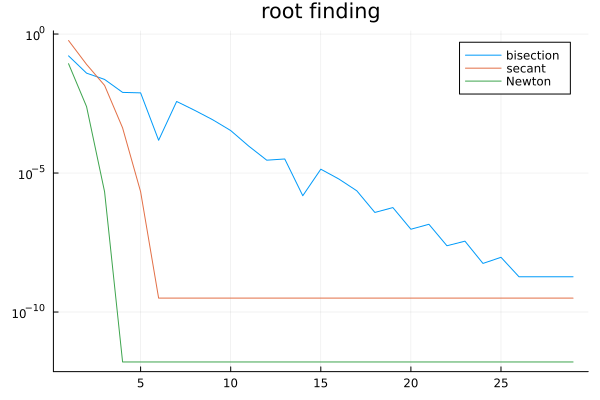

In [42]:
using Plots
f(x) = x^2-2
z = sqrt(2)
X = [myBisection(f, 1., 2.; tol = 1e-8, maxiter = m) for m in 2:30]
Y = [mySecant(f, 1, 2; tol = 1e-8, maxiter = m) for m in 2:30]
Z = [myNewton(f, derivative(f), 1; tol = 1e-8, maxiter = m) for m in 2:30]
plot(abs.(X.-z),yaxis=:log, title = "root finding", label = "bisection")    # if you did not return all iterates, then you need to make changes
plot!(abs.(Y.-z),yaxis=:log, label = "secant")
plot!(abs.(Z.-z),yaxis=:log, label = "Newton")